In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
vc = pd.read_csv('/content/drive/My Drive/all_vc.csv')

In [22]:
ind = ''
with open('output.txt', 'r') as f:
    for line in f:
        ind += f.readline()

ind = ind.replace('[', ', ')
ind = ind.replace('][', ', ')
ind = ind.replace(']\n','')
ind = ind.replace(']', ', ')

lst = [0] * len(vc)
for i in set(ind.split(', ')):
    try:
        lst[int(i)] = 1
    except:
        print(i)
        
vc['fintech_text'] = lst

In [0]:
vc.dropna(inplace=True)

In [0]:
def lencom(x):
    return len(x.split('~#')) - 1

In [0]:
def getdate(date):
    a = date.split('-')
    if a[0] == 'в':
        return 2020 * 100 + int(a[1])
    elif len(a[0]) > 4:
        return 202000 + 3
    return int(a[0]) * 100 + int(a[1])

In [0]:
vc['date_for_sort'] = vc['date'].apply(getdate)

In [0]:
def realdate(date):
    return str(date // 100) + '-' + str(date % 100)

In [0]:
vc['date'] = vc['date_for_sort'].apply(realdate)

In [0]:
vc.sort_values(by=['date_for_sort'], inplace=True)

In [0]:
vc.drop([1333, 1332, 1331, 1330, 1334], inplace=True)

In [32]:
vc[vc['fintech_text'] == 1]['section'].unique()

array(['Офтоп', 'Трибуна', 'Соцсети', 'Промо', 'Крипто', 'SEO', 'Финансы',
       'Образование', 'Торговля', 'Право', 'Истории', 'Вопросы',
       'Маркетинг', 'Офлайн', 'Что почитать', 'Еда', 'Будущее',
       'Транспорт', 'Личный опыт', 'Миграция', 'Дизайн', 'Медиа',
       'Техника', 'Сервисы', 'Карьера', 'Тинькофф', 'Офис', 'Сбербанк',
       'ITI Capital', 'Конкурсы', 'Nimax', 'Разработка', 'Приёмная',
       'Райффайзенбанк', 'DigitalHR', 'Tele2', 'Digital Horizon',
       'Яндекс.Маркет', 'Osome', 'Mail.ru Group', 'Точка', 'vc.ru',
       'ДПиИР', 'Digital Ghost', 'DataGang', 'Тинькофф Инвестиции',
       'Сбербанк 500 Startups', 'Артем Олійник',
       'Московский инновационный кластер', 'SACT261', 'Павел Чернов',
       'ИК Фридом Финанс Россия', 'Нескучные финансы', 'Катерина Юрьевна',
       'Александр Гусев', 'ВТБ', 'Olga Danova', 'Loymax Solutions',
       'SPACEPASS Global', 'Starta Ventures', 'Сергей Старинов',
       'Илья Черезов', 'Terra Cognito', 'Nastya Nemtsova',
 

In [33]:
vc[(vc['fintech_text'] == 1) & (vc['section'] == 'Артем Олійник')]

,Unnamed: 0,title,text,date,section,votes,views,bookmarks,comments,fintech_text,date_for_sort
86356,86356,"Проект TON от Telegram: задачи, особенности, п...",В фокусе событий последних дней – история наш...,2019-10,Артем Олійник,0.0,9.0,1.0,,1,201910


In [34]:
vc

,Unnamed: 0,title,text,date,section,votes,views,bookmarks,comments,fintech_text,date_for_sort
0,0,Чего ждать от веб-дизайна в 2014,Если вы ещё не устали от бесконечных подведен...,2014-1,Дизайн,36.0,27875.0,0.0,"~#Познавательная статья! Молодцы, классно раб...",0,201401
134,134,"Сергей Кондрашов, ""Лаоши"": Китайский не выучит...","Сергей Кондрашов, основатель стартапа Лаоши, ...",2014-1,Истории,19.0,11297.0,1.0,,0,201401
136,136,Илья Перекопский ушел из ВКонтакте,"Несмотря на то, что ВКонтакте не комментирует...",2014-1,Соцсети,23.0,14706.0,0.0,,0,201401
137,137,Исповедь фаундера закрывшегося стартапа,Под статьями с историями успеха различных ста...,2014-1,Офтоп,22.0,13622.0,0.0,,0,201401
138,138,"Иван Бойко, VisualPharm: День, когда мы сделал...","После того, как нас все послали и попросили п...",2014-1,Офтоп,16.0,7666.0,1.0,,0,201401
...,...,...,...,...,...,...,...,...,...,...,...
107278,107278,"Реклама смартфонов, которая вышла из-под контр...","Или еще один пример того, что реклама может б...",2020-3,Маркетинг,1.0,1431.0,18.0,~#Ахах. Неожиданно для себя посмотрел почти в...,0,202003
107276,107276,"«Билайн», МТС и Tele2 договорились провести мо...",Сейчас единственный оператор со связью в пере...,2020-3,Техника,3.0,5422.0,8.0,"~#Эм, с каких пор мегафон в перегонах ловит? ...",0,202003
107273,107273,"Не открываются сайты, расположенные на хостинг...",Второй раз за две передели перестают работать...,2020-3,Приёмная,3.0,2418.0,3.0,~#На вкус и цвет все фломастеры разные :)\nВы...,0,202003
107271,107271,Благотворительность изменилась: как помочь себ...,0\n\n \n Обсудить\n\n ...,2020-3,Правильно.ру,2.0,25.0,2.0,,0,202003


In [43]:
nuzh = vc.loc[vc['fintech_text'] != 0]
nuzh

,Unnamed: 0,title,text,date,section,votes,views,bookmarks,comments,fintech_text,date_for_sort
126,126,Displair: смена стратегии и комментарий фонда ...,Полторы недели назад мы писали про российский...,2014-1,Офтоп,17.0,8162.0,0.0,,1,201401
191,191,Платформа для ведения блогов Medium привлекла ...,"Стартап Medium, который представляет собой ги...",2014-1,Трибуна,13.0,4936.0,0.0,,1,201401
185,185,Онлайн-ритейлер Lamoda привлек инвестиций на €...,Как сообщается в поступившем в редакцию пресс...,2014-1,Офтоп,12.0,3235.0,0.0,,1,201401
106,106,Самый крупный украинский интернет-ресурс для р...,"Макс Ищенко, основатель и владелец ресурса DO...",2014-1,Офтоп,19.0,10987.0,0.0,,1,201401
172,172,Банк России приравнял операции с биткоинами к ...,27 января 2014 года Банк России выпустил прес...,2014-1,Офтоп,19.0,11000.0,0.0,,1,201401
...,...,...,...,...,...,...,...,...,...,...,...
107188,107188,Еврооблигации Минфина: миллионная льгота на пр...,В этой статье я расскажу об особенностях нало...,2020-3,Дмитрий Лавник,1.0,3436.0,2.0,"~#Дмитрий, интересный материал, спасибо! ~#А...",1,202003
107216,107216,Новый виток развития SMM: от коммерции к КГХ М...,Вчера на официальных страницах Фонда капиталь...,2020-3,Маркетинг,-3.0,438.0,14.0,"~#Очень милый эвент))~#замечательный пост, к ...",1,202003
107203,107203,Что такое ИИС? Типы вычетов по ИИС,Начинающие инвесторы могут получить поддержку...,2020-3,Logos Freedom,0.0,3.0,0.0,,1,202003
107341,107341,Как привлечь крупные инвестиции?,На определённом этапе собственник бизнеса зад...,2020-3,SBSB LEGAL SERVICES,0.0,11.0,0.0,,1,202003


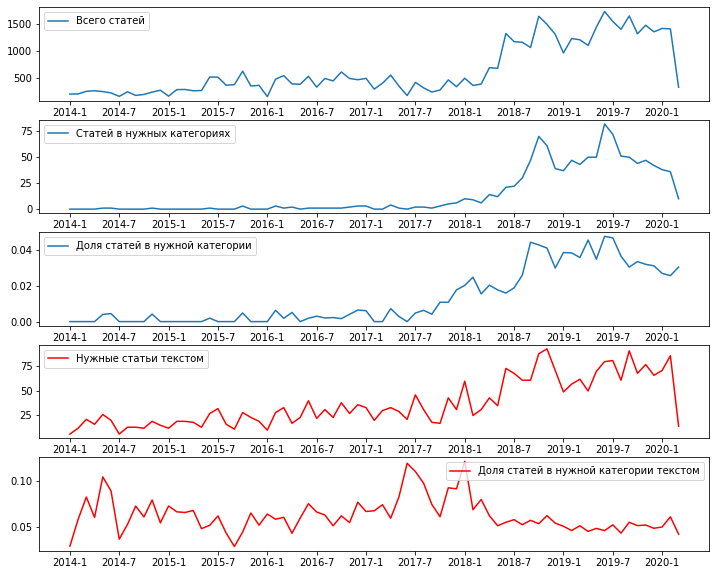

In [68]:
fig, ax = plt.subplots(5, sharey='row', figsize=(12,10))
y = np.array([len(vc[(vc['date'] == date) & vc['section'].isin(gd)]) for date in dates])
all = np.array([len(vc[vc['date'] == date]) for date in vc['date'].unique()])
share = y/all
share1 = potext/all
potext = np.array([len(nuzh[nuzh['date'] == date]) for date in nuzh['date'].unique()])
ax[0].plot(vc['date'].unique(), [len(vc[vc['date'] == date]) for date in vc['date'].unique()], label="Всего статей")
ax[1].plot(vc['date'].unique(), y, label="Статей в нужных категориях")
ax[2].plot(vc['date'].unique(), share, label='Доля статей в нужной категории')
ax[3].plot(nuzh['date'].unique(), potext , 'r', label='Нужные статьи текстом')
ax[4].plot(vc['date'].unique(), share1, 'r', label='Доля статей в нужной категории текстом')
for i in range(5):
    ax[i-1].set_xticks(ticks=years)
    ax[i-1].legend()
plt.show()

In [52]:
vc['vot'] = vc['votes'] / vc['views']
nuzh['vot'] = nuzh['votes'] / nuzh['views']


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [53]:
vc

,Unnamed: 0,title,text,date,section,votes,views,bookmarks,comments,fintech_text,date_for_sort,vot
0,0,Чего ждать от веб-дизайна в 2014,Если вы ещё не устали от бесконечных подведен...,2014-1,Дизайн,36.0,27875.0,0.0,"~#Познавательная статья! Молодцы, классно раб...",0,201401,0.001291
134,134,"Сергей Кондрашов, ""Лаоши"": Китайский не выучит...","Сергей Кондрашов, основатель стартапа Лаоши, ...",2014-1,Истории,19.0,11297.0,1.0,,0,201401,0.001682
136,136,Илья Перекопский ушел из ВКонтакте,"Несмотря на то, что ВКонтакте не комментирует...",2014-1,Соцсети,23.0,14706.0,0.0,,0,201401,0.001564
137,137,Исповедь фаундера закрывшегося стартапа,Под статьями с историями успеха различных ста...,2014-1,Офтоп,22.0,13622.0,0.0,,0,201401,0.001615
138,138,"Иван Бойко, VisualPharm: День, когда мы сделал...","После того, как нас все послали и попросили п...",2014-1,Офтоп,16.0,7666.0,1.0,,0,201401,0.002087
...,...,...,...,...,...,...,...,...,...,...,...,...
107278,107278,"Реклама смартфонов, которая вышла из-под контр...","Или еще один пример того, что реклама может б...",2020-3,Маркетинг,1.0,1431.0,18.0,~#Ахах. Неожиданно для себя посмотрел почти в...,0,202003,0.000699
107276,107276,"«Билайн», МТС и Tele2 договорились провести мо...",Сейчас единственный оператор со связью в пере...,2020-3,Техника,3.0,5422.0,8.0,"~#Эм, с каких пор мегафон в перегонах ловит? ...",0,202003,0.000553
107273,107273,"Не открываются сайты, расположенные на хостинг...",Второй раз за две передели перестают работать...,2020-3,Приёмная,3.0,2418.0,3.0,~#На вкус и цвет все фломастеры разные :)\nВы...,0,202003,0.001241
107271,107271,Благотворительность изменилась: как помочь себ...,0\n\n \n Обсудить\n\n ...,2020-3,Правильно.ру,2.0,25.0,2.0,,0,202003,0.080000


In [0]:
vot_all = np.array([np.median(vc[(vc['date'] == date)]['vot']) for date in dates])
vot_fint = np.array([np.median(nuzh[(nuzh['date'] == date)]['vot']) for date in dates])

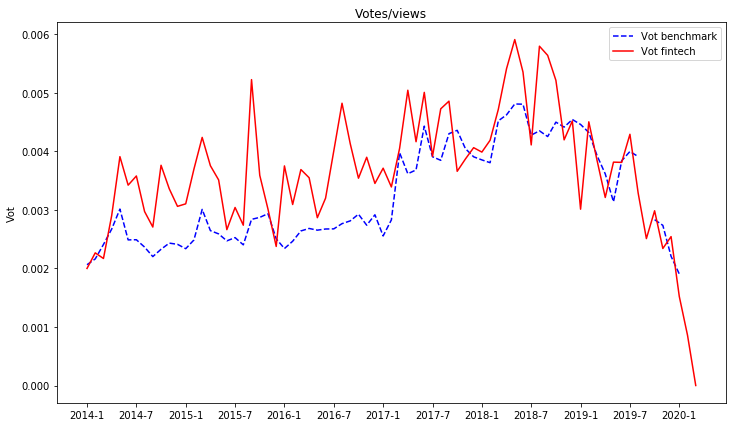

In [57]:
fig = plt.figure(figsize=(12,7))
plt.plot(dates, vot_all, '--b', label='Vot benchmark')
plt.plot(dates, vot_fint, 'r', label='Vot fintech')
plt.title('Votes/views')
plt.legend()
plt.xticks(ticks=years)
plt.ylabel('Vot')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


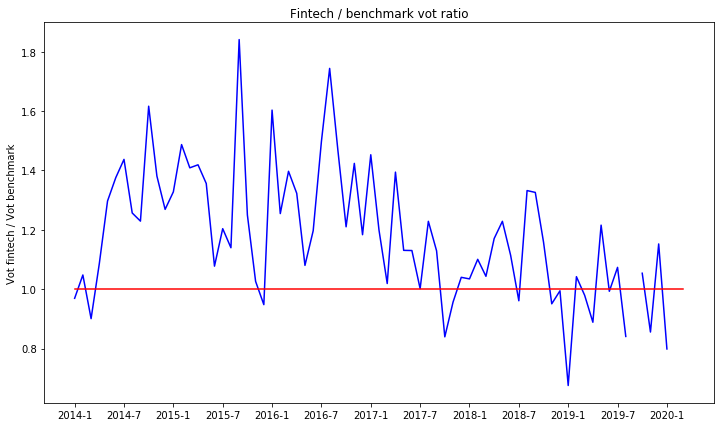

In [62]:
fig = plt.figure(figsize=(12,7))
plt.plot(dates, vot_fint / vot_all, 'b')
plt.ylabel('Vot fintech / Vot benchmark')
plt.xticks(ticks=years)
plt.title('Fintech / benchmark vot ratio')
plt.plot([1]*75, 'r')
plt.show()

In [48]:
print(len(nuzh))
sum(y)

2788


1090

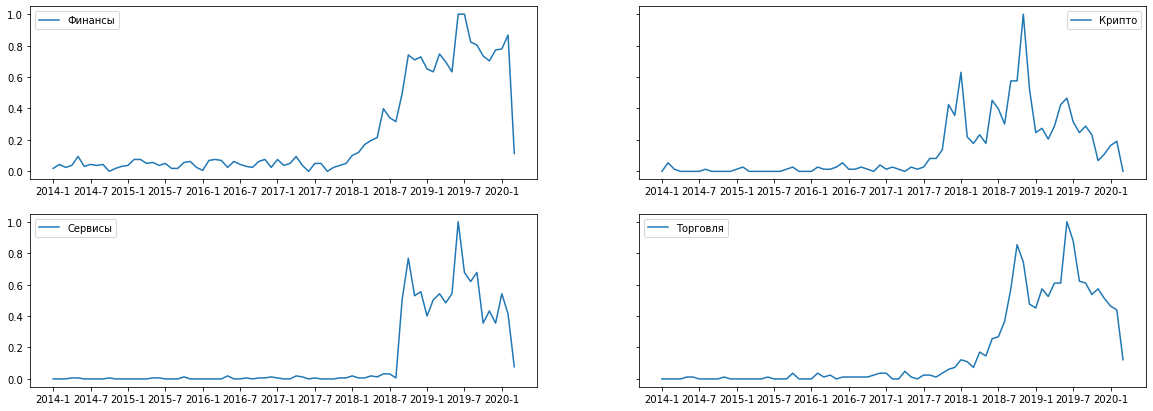

In [54]:
dates = vc['date'].unique()
years = range(0,74,6)
fig, ax = plt.subplots(2, 2, sharey='row', figsize=(20,7))
c = 0
cs = [(0, 0), (0, 1), (1, 0), (1, 1)]
for word in ['Финансы', 'Крипто', 'Сервисы', 'Торговля']:
    k = cs[c]
    gd = set()
    for i in vc['section']:
        if word in i:
            gd.add(i)
    y = np.array([len(vc[(vc['date'] == date) & vc['section'].isin(gd)]) for date in dates])
    ax[k].plot(dates, (y - min(y)) / (max(y) - min(y)), label=word)
    ax[k].legend()
    c += 1
    ax[k].set_xticks(ticks=years)
plt.show()